In [52]:
import torch
import torchaudio
import PIL.Image
import matplotlib.pyplot as plt
from torchvision.transforms.v2 import ToPILImage, PILToTensor
from IPython.display import Audio as play
from datasets import load_dataset, Audio
from tft.mdct import mdct, inverse_mdct
from tft.mdct2d import mdct2d, inverse_mdct2d
from tft.utils import compand, decompand

In [22]:
esc50 = load_dataset("danjacobellis/esc_50",split='train').cast_column('opus', Audio(decode=False))
x, fs = torchaudio.load(esc50[33]['opus']['bytes'],normalize=False);
assert fs==48000; assert x.min() >= -1.0; assert x.max() <= 1.0
n_frames = 448
n_freq = 512
x = x[0,:((n_frames+1)*n_freq)]
assert x.shape[0] == ((n_frames+1)*n_freq)
play(x,rate=fs)

torch.Size([448, 512])


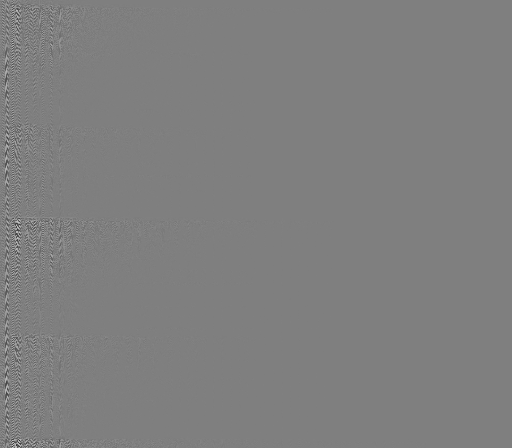

In [24]:
X = compand(mdct(
    signals = x,
    frame_length = 2*n_freq,
))/10
x_hat = inverse_mdct(
    mdcts = decompand(10*X),
)
print(X.shape)
display(play(x_hat,rate=fs))
# display(ToPILImage()(X/2 + 0.5).resize((2*X.shape[1],2*X.shape[0]),resample=PIL.Image.Resampling.LANCZOS))
display(ToPILImage()(X/2 + 0.5))

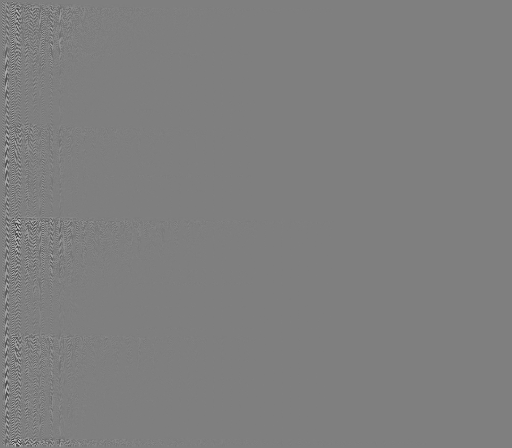

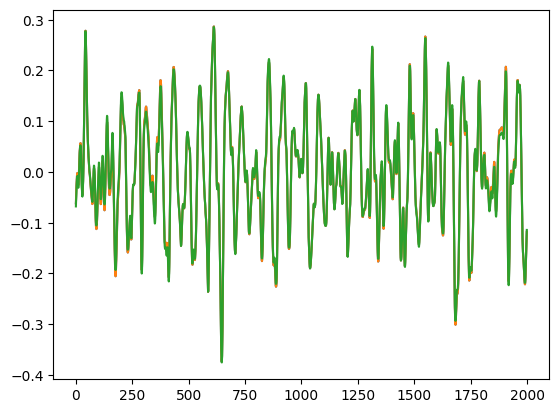

In [44]:
ξ = compand(mdct2d(X, 8, 8))/10
X_hat = inverse_mdct2d(decompand(ξ*10))
# display(ToPILImage()(X_hat/2 + 0.5).resize((2*X_hat.shape[1],2*X_hat.shape[0]),resample=PIL.Image.Resampling.LANCZOS))
display(ToPILImage()(X_hat/2 + 0.5))
x_hat_hat = inverse_mdct(
    mdcts = decompand(10*X_hat),
)
display(play(x_hat_hat,rate=fs))
plt.plot(x[5000:7000])
plt.plot(x_hat[5000:7000])
plt.plot(x_hat_hat[5000:7000])

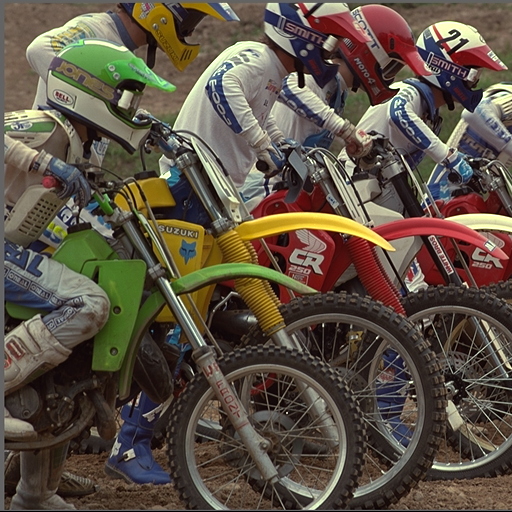

In [53]:
img = PIL.Image.open("kodim05.png").crop((0,0,512,512))
img

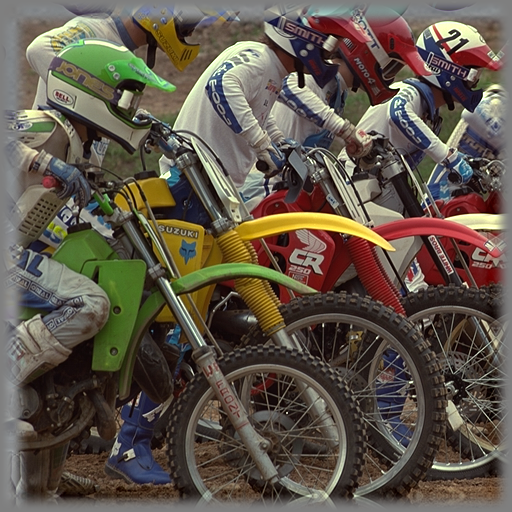

In [241]:
y = PILToTensor()(img).to(torch.float) / 127.5 - 1.0
Y = compand(mdct2d(y, 64, 64))/40
y_hat = inverse_mdct2d(decompand(40*Y))
ToPILImage()((y_hat/2).clamp(-0.5,0.5)+0.5)

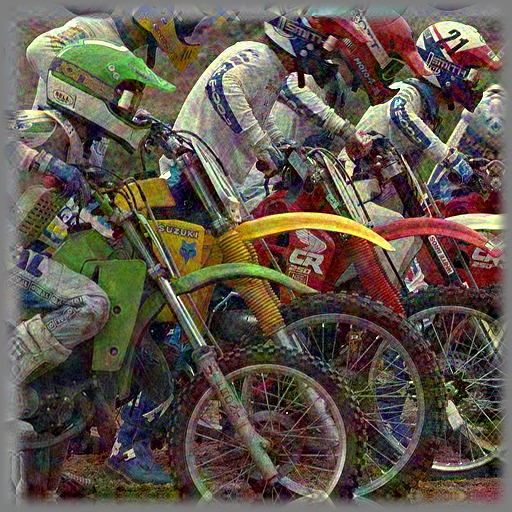

In [242]:
Y2 = Y.clone()
n_bands = 0
for i in range(32):
    for j in range(32):
        Yi = Y[:,:,:,i,j]
        Y2[:,:,:,i,j] = (16*Yi).round().clamp(-7,7)/16
y_hat = inverse_mdct2d(decompand(40*Y2))
ToPILImage()((y_hat/2).clamp(-0.5,0.5)+0.5)